# Reading LibFM Results

In [2]:
import numpy as np
import pandas as pd
import os
%matplotlib inline

LibFM provided us a way to capture the log files from each run through the GridSearch. All of these logs were saved into the same folder: libFM_results. The file captures the results (RMSE, MAE, training RMSE, etc.) for all iterations and can be easily read into a DataFrame.

In [3]:
results=[]
directory='libFM_results/'
min_rmse=2
val=""
for filename in os.listdir(directory):
    if 'incremental' not in filename and 'output' not in filename:
        rmse = pd.read_csv(directory+filename, sep='\t').rmse.min()
        first=filename.index('_')
        second=filename.index('_',first+1)
        third=filename.index('_',second+1)
        period = filename.rfind('.')
        rank = filename[first+1:second]
        stdev = filename[second+1:third]
        lr = filename[third+1:period]
        results.append([rank,stdev,lr,rmse])
        if rmse<min_rmse:
            min_rmse=rmse
            val=filename

In [4]:
print("The best rmse value is {} coming from {}".format(min_rmse, val))

The best rmse value is 0.832408 coming from log_20_0.1_0.005.libfm


In [5]:
columns=['rank','stdev','lr','rmse']
res=pd.DataFrame(results,columns=columns)
res.rank=res['rank'].astype(int)
res.head()

,rank,stdev,lr,rmse
0,13,0.01,0.001,0.836712
1,13,0.01,0.01,0.844949
2,13,0.01,0.1,1.465280
3,13,0.1,0.001,0.838115
4,13,0.1,0.005,0.835781


## Plotting Rank

In [114]:
rank = res.groupby('rank').mean()
rank.index=rank.index.astype(int)
rank = rank.sort_index()

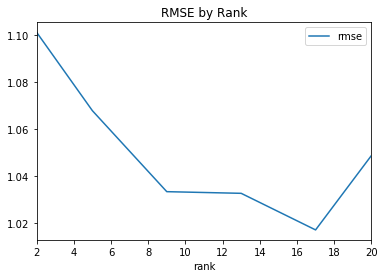

In [116]:
rank.plot(title="RMSE by Rank")

## Plotting Initial Standard Deviation

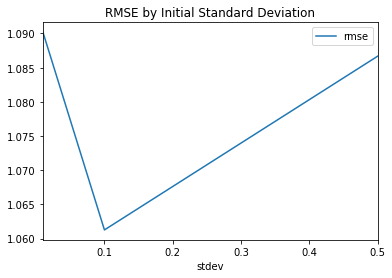

In [6]:
stdev = res[res.stdev.astype(float)<1].groupby('stdev').mean()
stdev.index=stdev.index.astype(float)
stdev = stdev.sort_index()
stdev.plot(title="RMSE by Initial Standard Deviation")

## Plotting Learning Rate

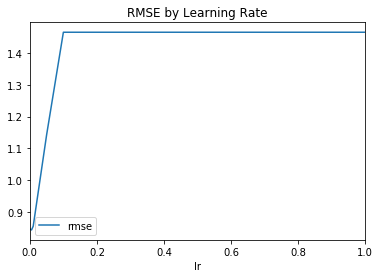

In [84]:
lr = res.groupby('lr').mean()
lr.index=lr.index.astype(float)
lr = lr.sort_index()
lr.plot(title="RMSE by Learning Rate")

## Plotting how RMSE changes with iterations (both training and testing)

In [70]:
long = pd.read_csv('libFM_results/incremental_log2_normnlp', sep='\t')

In [71]:
long['iter']=long.index+1

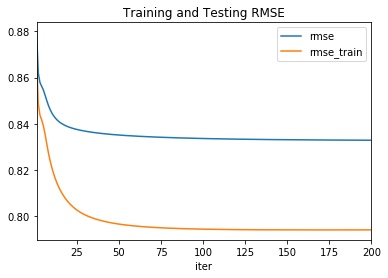

In [72]:
long = long[['iter','rmse','rmse_train']]
long.plot(x='iter',y=['rmse','rmse_train'], title="Training and Testing RMSE")

## Plotting how each set of features changes the RMSE

We also trained the model with the chosen parameters for 40 iterations with each subset of feature groups (so user - item rating + one selected group of features) in order to see what the incremental change was to the overall RMSE.

In [104]:
long_40 = long[long.iter <=40]

In [95]:
solo = pd.read_csv('libFM_results/incremental_log_solo', sep='\t')
authors = pd.read_csv('libFM_results/incremental_log_authors', sep='\t')
nlp = pd.read_csv('libFM_results/incremental_log_nlp', sep='\t')
years = pd.read_csv('libFM_results/incremental_log_years', sep='\t')
genres = pd.read_csv('libFM_results/incremental_log_genres', sep='\t')
language =  pd.read_csv('libFM_results/incremental_log_language', sep='\t')

In [96]:
solo['iteration']=solo.index+1
solo = solo[['iteration', 'rmse']]
solo.columns=['iteration','no features']

In [105]:
solo['authors']=authors.rmse
solo['language']=language.rmse
solo['nlp']=nlp.rmse
solo['genres']=genres.rmse
solo['authors']=authors.rmse
solo['years']=years.rmse
solo['all']=long_40.rmse

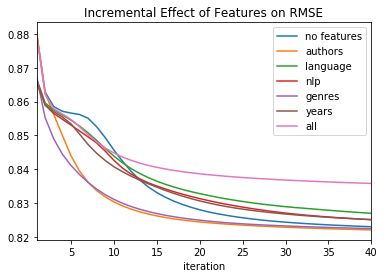

In [107]:
solo.plot(x='iteration',y=['no features','authors','language','nlp','genres','years','all'], title='Incremental Effect of Features on RMSE')

## Plotting performance of genres only model to compare to FastFM

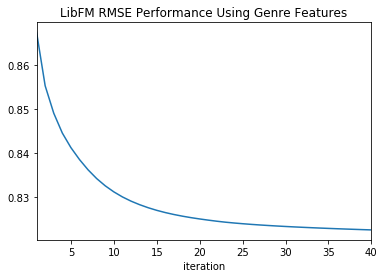

In [109]:
solo.plot(x='iteration',y='genres', title='LibFM RMSE Performance Using Genre Features', legend=False)